# Import libraries

In [13]:
import time
from Asset_degradation import *
from failure_mode_class import Failure_mode_degradation

# Global variables

In [7]:
short_term = Failure_mode_degradation(10, 100, 2, 4, [], 100, 200)
long_term = Failure_mode_degradation(0, 200, 0.1, 2, [], 1000, 2000)
shock_threshold = 50
lameda_shocks = 0.5 #shocks per time step
shock_intensity_mean = 7 #normal distribution
shock_intensity_stdev = 2 #normal distribution
simulating_periods = 1000

# Test developed functions

## Simulate degradation (example)

In [16]:
start_time = time.time()
short_term, long_term = simulate_degradation(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods)
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

--- Simulation computational time = 0.0360260009765625 seconds ---


## Get maintenance interventions (example)

In [9]:
st_teste = maintenance_interventions(short_term.degradation, short_term.initial_condition, short_term.failure_threshold)
lt_teste = maintenance_interventions(long_term.degradation, long_term.initial_condition, long_term.failure_threshold)

## Compute expected costs for the corrective maintenance (example)

In [10]:
expected_maintenance_cost_per_unit_of_time = maintenance_costs(long_term, short_term, 'CM') / expected_lifetime(short_term.degradation, short_term.initial_condition)
print(f'Expected maintenance cost per unit of time {expected_maintenance_cost_per_unit_of_time}')

Expected maintenance cost per unit of time 424.390243902439


## Plot of the simulated degradation (example)

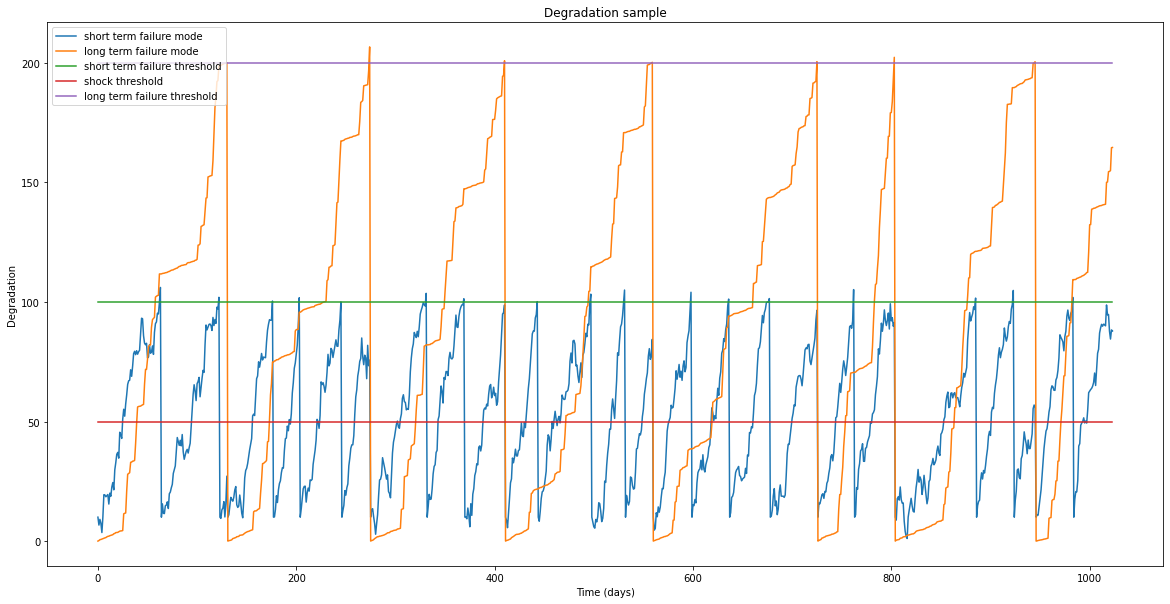

In [11]:
degradation_plot(short_term.degradation, short_term.failure_threshold, shock_threshold, long_term.degradation, long_term.failure_threshold)